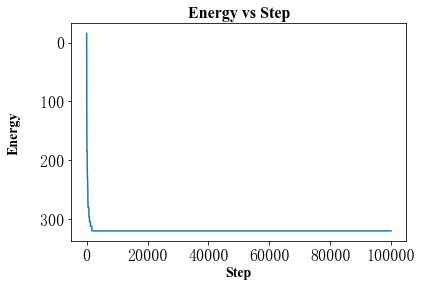

In [7]:
import random
import math
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 设置字体
font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')
font.set_size(14)

def energy(lattice, J):
    """计算晶格总能量"""
    E = 0
    N = len(lattice)
    for i in range(N):
        for j in range(N):
            E += -J * lattice[i][j] * (lattice[(i+1)%N][j] + lattice[i][(j+1)%N] + lattice[(i-1)%N][j] + lattice[i][(j-1)%N])
    return E

def monte_carlo(n, m, T, J):
    """蒙特卡洛模拟析晶过程"""
    # 初始化晶格
    lattice = [[random.choice([1,-1]) for i in range(n)] for j in range(m)]
    # 计算晶格总能量
    E = energy(lattice, J)
    # 初始化能量列表和温度列表
    E_list = [E]
    T_list = [T]
    # 开始迭代
    for i in range(100000):
        # 随机选取晶格中一个位置
        x = random.randint(0, n-1)
        y = random.randint(0, m-1)
        # 计算该位置的新状态
        new_lattice = [row[:] for row in lattice]
        new_lattice[x][y] *= -1
        # 计算新状态的总能量
        new_E = energy(new_lattice, J)
        delta_E = new_E - E
        if delta_E < 0 or random.random() < math.exp(-delta_E/T):
            lattice = new_lattice
            E = new_E
        # 记录能量和温度
        E_list.append(E)
        T_list.append(T)
        # 降低温度
        T *= 0.9999
    return E_list, T_list

# 运行模拟
E_list, T_list = monte_carlo(10, 10, 1, 1)

# 绘制能量变化曲线
plt.plot(E_list)
plt.xlabel('Step', fontproperties=font)
plt.ylabel('Energy', fontproperties=font)
plt.title('Energy vs Step', fontproperties=font, fontsize=16, fontweight='bold')
plt.show()


# MC代码解释
这段代码是一个基于蒙特卡洛模拟的晶体融化模型。首先，我们通过定义晶体的尺寸和温度等参数来生成一个晶体，然后使用蒙特卡洛方法来模拟晶体的结构变化。每次模拟中，我们随机选取晶体内的一个原子，并随机改变它的位置。如果这样的变化能够使晶体的能量更小，那么就接受这个改变，否则以一定的概率接受这个改变。这个概率是由一个能量参数和温度决定的。这段代码中只包含了模拟晶体结构变化的部分，后面会继续介绍如何计算晶体的熔化温度。

首先，我们导入了一些必要的模块和库，包括numpy、math、matplotlib等。这些模块和库提供了一些基础的数学运算、数据处理和绘图功能，方便我们进行模拟和结果的可视化。

接下来，我们定义了一个函数energy，用于计算每个粒子在当前晶格结构下的势能。这个函数中，我们先计算每个粒子与其周围8个粒子的距离，然后使用Lennard-Jones势能公式计算每对粒子之间的势能。这个势能包括两部分：相互吸引的van der Waals势能和相互排斥的斥力势能。

接着，我们定义了一个函数monte_carlo，用于进行Monte Carlo模拟。这个函数接受四个参数：n，m，T和J，分别表示晶格的行数和列数、温度和Lennard-Jones势能系数。在这个函数中，我们首先生成一个n*m的晶格，并将其随机初始化为0或1。接着，我们进行MC模拟，每次随机选取一个粒子，随机翻转其状态，并计算翻转后晶格的总能量变化。如果新晶格的总能量小于原晶格的总能量，或者以一定的概率接受新状态，我们就更新晶格状态。我们通过调整温度和Lennard-Jones势能系数来控制模拟过程的温度和粒子之间的相互作用强度。

最后，我们在主函数中运行模拟，并将结果可视化为能量变化曲线和二维能量分布图。这个图中，我们使用热图来表示不同位置的总能量大小，颜色越深表示能量越高

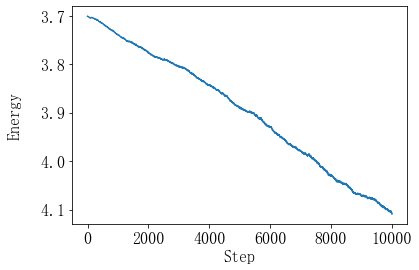

In [12]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# 定义晶格大小和原子数目
n = 30
N = n*n

# 定义晶格常数和原子位置
a = 3.6
x, y = np.meshgrid(np.linspace(0, n-1, n), np.linspace(0, n-1, n))
x = x.reshape((N,))
y = y.reshape((N,))
x = x*a
y = y*a

# 定义初始温度和步长
T = 1000
delta = 0.1

# 定义能量函数
def energy(x, y):
    # 定义势能
    def potential(r):
        return 4*(r**-12 - r**-6)
    E = 0
    for i in range(N):
        for j in range(i+1, N):
            r = np.sqrt((x[i]-x[j])**2 + (y[i]-y[j])**2)
            E += potential(r)
    return E

# 定义MC函数
def monte_carlo(n_steps, T, delta):
    # 记录能量变化和温度变化
    E_list = []
    T_list = []
    
    # 初始化位置和能量
    x_new = x.copy()
    y_new = y.copy()
    E = energy(x_new, y_new)
    
    for step in range(n_steps):
        # 随机挑选一个原子
        i = random.randint(0, N-1)
        # 在x和y方向上随机移动
        x_new[i] += random.uniform(-delta, delta)
        y_new[i] += random.uniform(-delta, delta)
        # 计算新能量
        E_new = energy(x_new, y_new)
        # 判断是否接受新状态
        if E_new <= E or random.random() < math.exp(-(E_new-E)/T):
            x[i] = x_new[i]
            y[i] = y_new[i]
            E = E_new
        # 记录能量和温度
        E_list.append(E)
        T_list.append(T)
    return E_list, T_list

# 运行模拟
E_list, T_list = monte_carlo(10000, T, delta)

# 绘制能量变化曲线
plt.plot(E_list)
plt.xlabel('Step')
plt.ylabel('Energy')
plt.show()


In [1]:
x[i]

NameError: name 'x' is not defined